In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column',None)

In [2]:
# reading dataset
adrs_train="C:/Users/sneha kannan/Desktop/jobathon/train_BRCpofr.csv"
adrs_test="C:/Users/sneha kannan/Desktop/jobathon/test_koRSKBP.csv"
data=pd.read_csv(adrs_train,index_col='id')

### Train dataset

In [3]:
# viewing training dataset
data.head(10)

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
id,,,,,,,,,,,
1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
6,Male,Rural,High School,More than 10L,1,1,0,1,C,Gold,348768
7,Female,Rural,Bachelor,5L-10L,1,6,0,More than 1,A,Gold,238920
8,Female,Urban,High School,5L-10L,0,0,5473,More than 1,A,Silver,64128
9,Female,Urban,High School,5L-10L,1,3,6105,More than 1,A,Gold,94536


### Basic Analysis

In [4]:
# shape of dataset
data.shape

(89392, 11)

In [5]:
#columns in dataset
data.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [6]:
# checking for null values
data.isnull().sum()

gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [7]:
# checking duplicates
data.duplicated().sum()

26

In [8]:
# dropping duplicates
data.drop_duplicates(keep='first',inplace=True)

In [9]:
# basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89366 entries, 1 to 89392
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          89366 non-null  object
 1   area            89366 non-null  object
 2   qualification   89366 non-null  object
 3   income          89366 non-null  object
 4   marital_status  89366 non-null  int64 
 5   vintage         89366 non-null  int64 
 6   claim_amount    89366 non-null  int64 
 7   num_policies    89366 non-null  object
 8   policy          89366 non-null  object
 9   type_of_policy  89366 non-null  object
 10  cltv            89366 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 8.2+ MB


In [10]:
# Dispalying number of unique vales in each column
data.nunique()

gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [11]:
# Displaying unique values and their frequency
col=data.columns

for i in col:
    vc=data[i].value_counts()
    vc=pd.DataFrame(vc)
    print(i,vc)

gender         gender
Male     50484
Female   38882
area         area
Urban  62450
Rural  26916
qualification              qualification
High School          46233
Bachelor             39387
Others                3746
income                income
5L-10L          52693
2L-5L           21158
More than 10L   13661
<=2L             1854
marital_status    marital_status
1           51424
0           37942
vintage    vintage
6    17759
7    13090
5    12476
4    10468
2     9162
1     7671
8     7624
3     7085
0     4031
claim_amount        claim_amount
0             17645
4006             38
3912             33
3834             32
3833             32
...             ...
10979             1
12593             1
23063             1
21695             1
17143             1

[10889 rows x 1 columns]
num_policies              num_policies
More than 1         60254
1                   29112
policy    policy
A   56627
B   24626
C    8113
type_of_policy           type_of_policy
Platinum           47

In [12]:
#statistical analysis of numerical columns
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.describe()

,marital_status,vintage,claim_amount,cltv
count,89366.000000,89366.000000,89366.000000,89366.000000
mean,0.575431,4.595461,4352.768435,97966.413759
std,0.494280,2.290606,3261.989737,90622.727570
min,0.000000,0.000000,0.000000,24828.000000
25%,0.000000,3.000000,2407.250000,52851.000000
50%,1.000000,5.000000,4089.000000,66408.000000
75%,1.000000,6.000000,6094.000000,103452.000000
max,1.000000,8.000000,31894.000000,724068.000000


In [13]:
# statistical analysis of categorical columns
categorical_data = data.select_dtypes(include=[object])
categorical_data.describe()

,gender,area,qualification,income,num_policies,policy,type_of_policy
count,89366,89366,89366,89366,89366,89366,89366
unique,2,2,3,4,2,3,3
top,Male,Urban,High School,5L-10L,More than 1,A,Platinum
freq,50484,62450,46233,52693,60254,56627,47777


### Exploratory Data Analysis

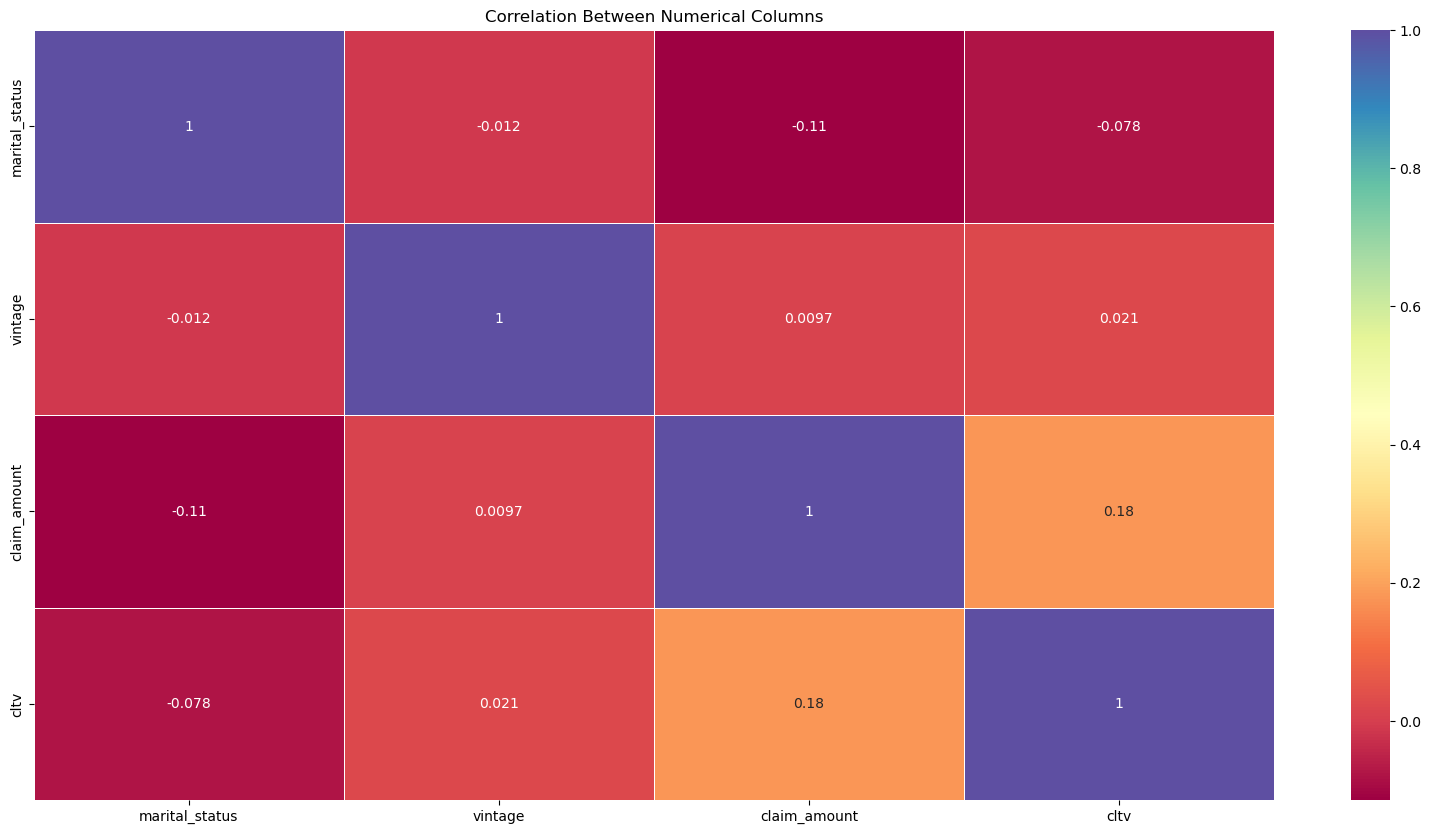

In [14]:
# correlation matrix for numerical columns
corr_matrix = numeric_data.corr()
plt.figure(figsize=(20,10))
plt.title('Correlation Between Numerical Columns')
sns.heatmap(corr_matrix,annot=True,xticklabels=True, yticklabels=True,linewidth=.5,cmap='Spectral')
plt.show()

No high correlation values observed between numerical columns

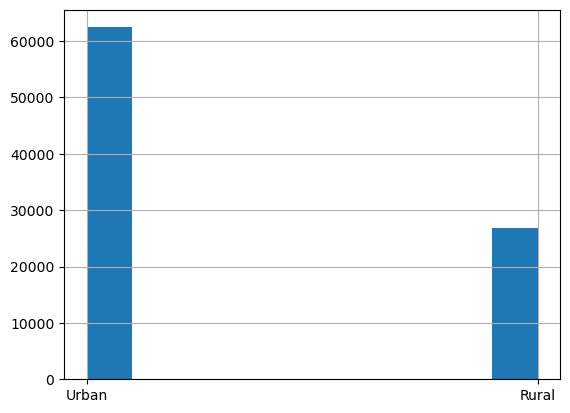

In [15]:
# Plotting the histogram of Area
data['area'].hist();

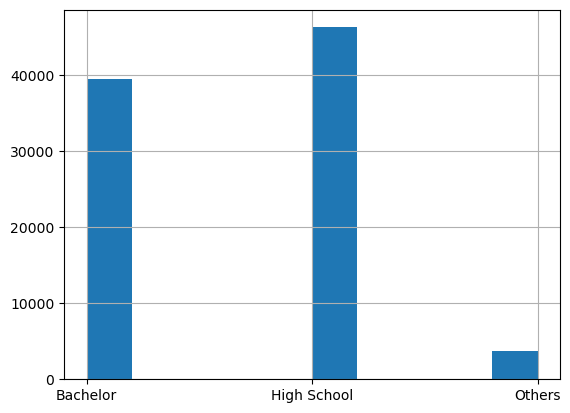

In [16]:
# Plotting the histogram of Qualification
data['qualification'].hist();

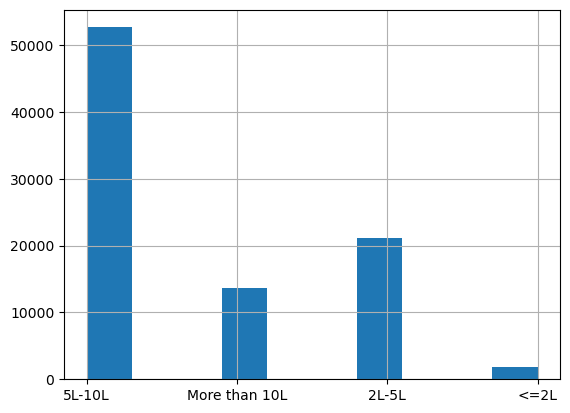

In [17]:
# Plotting the histogram of Income
data['income'].hist();

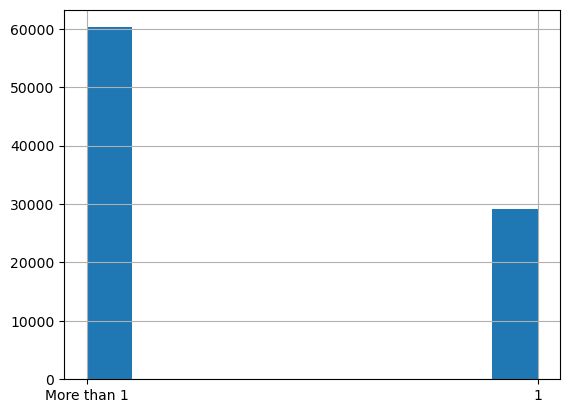

In [18]:
# Plotting the histogram of number of policies
data['num_policies'].hist();

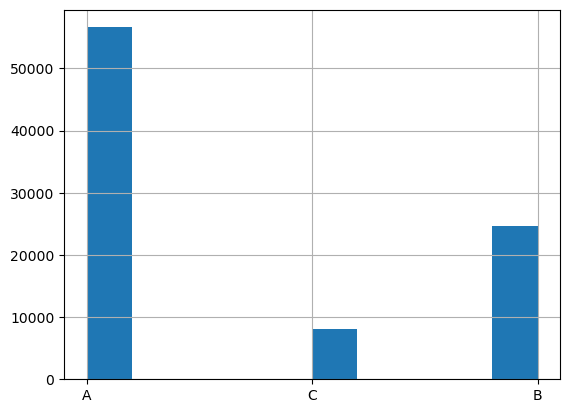

In [19]:
# Plotting the histogram Policy
data['policy'].hist();

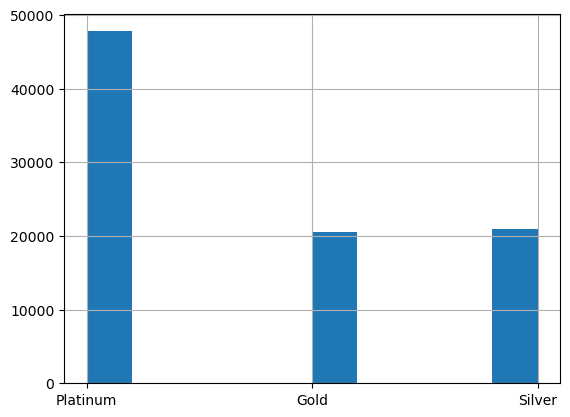

In [20]:
# Plotting the histogram of Type of policy
data['type_of_policy'].hist();

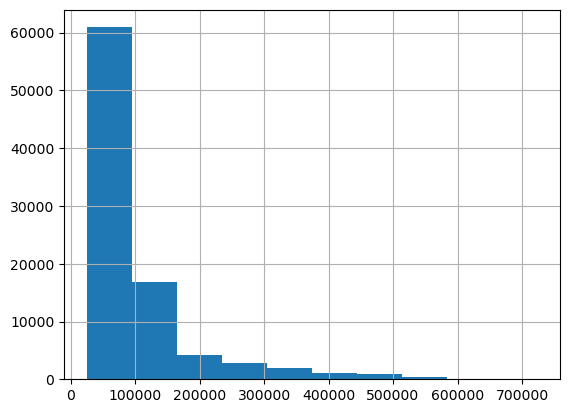

In [21]:
# Plotting the histogram of CLTV
data['cltv'].hist();

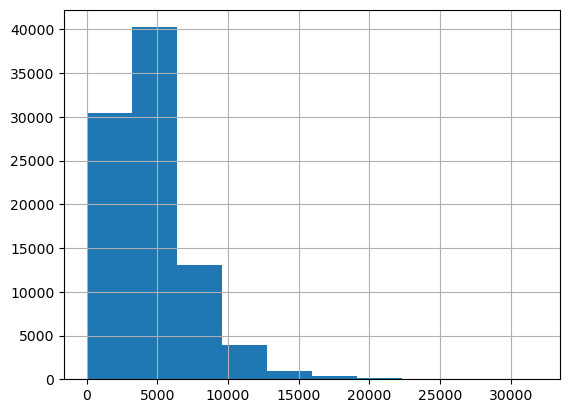

In [22]:
# Plotting the histogram of claim amount
data['claim_amount'].hist();

### Preprocessing

In [23]:
# Getting numerical columns for scaling
num =  data.select_dtypes(include=[np.number]).columns.drop(['cltv','marital_status','vintage'])
num

Index(['claim_amount'], dtype='object')

In [24]:
# importing Standard Scaler
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [25]:
#Standard Scaling the data
for i in num:
    data[[i]]=scalar.fit_transform(data[[i]])

In [26]:
# Getting categorical columns for encoding
col = categorical_data.columns
col

Index(['gender', 'area', 'qualification', 'income', 'num_policies', 'policy',
       'type_of_policy'],
      dtype='object')

In [27]:
# label encoding columns od object dtype
from sklearn import preprocessing
lable_encd=preprocessing.LabelEncoder()
for feat in col:
    data[feat]=lable_encd.fit_transform(data[feat].astype(str))
data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
id,,,,,,,,,,,
1,1,1,0,1,1,5,0.440602,1,0,1,64308
2,1,0,1,1,0,8,0.222942,1,0,1,515400
3,1,1,0,1,1,8,-0.537641,1,0,1,64212
4,0,0,1,1,0,7,-1.334398,1,0,1,97920
5,1,1,1,3,1,6,-0.258975,1,0,0,59736


In [28]:
# Write out cleaned data
data.to_csv("C:/Users/sneha kannan/Desktop/jobathon/train_cleaned.csv",index=False)

### Test dataset

In [29]:
# reading dataset
data=pd.read_csv(adrs_test,index_col='id')

In [30]:
# viewing datset
data.head(10)

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
id,,,,,,,,,,
89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
89398,Female,Rural,High School,2L-5L,1,6,3697,More than 1,A,Gold
89399,Male,Urban,Bachelor,5L-10L,0,6,0,1,A,Platinum
89400,Female,Urban,High School,2L-5L,0,2,0,More than 1,B,Gold
89401,Male,Rural,Bachelor,5L-10L,0,4,0,1,A,Silver


### Basic analysis

In [31]:
# checking shape of dataset
data.shape

(59595, 10)

In [32]:
# displaying columns in dataset
data.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy'],
      dtype='object')

In [33]:
# checking null values
data.isnull().sum()

gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

In [34]:
# basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59595 entries, 89393 to 148987
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          59595 non-null  object
 1   area            59595 non-null  object
 2   qualification   59595 non-null  object
 3   income          59595 non-null  object
 4   marital_status  59595 non-null  int64 
 5   vintage         59595 non-null  int64 
 6   claim_amount    59595 non-null  int64 
 7   num_policies    59595 non-null  object
 8   policy          59595 non-null  object
 9   type_of_policy  59595 non-null  object
dtypes: int64(3), object(7)
memory usage: 5.0+ MB


In [35]:
# Dispalying number of unique vales in each column
data.nunique()

gender               2
area                 2
qualification        3
income               4
marital_status       2
vintage              9
claim_amount      9839
num_policies         2
policy               3
type_of_policy       3
dtype: int64

In [36]:
# Displaying unique values and their frequency
col=data.columns

for i in col:
    vc=data[i].value_counts()
    vc=pd.DataFrame(vc)
    print(i,vc)

gender         gender
Male     33641
Female   25954
area         area
Urban  41441
Rural  18154
qualification              qualification
High School          30835
Bachelor             26353
Others                2407
income                income
5L-10L          35088
2L-5L           14060
More than 10L    9163
<=2L             1284
marital_status    marital_status
1           34382
0           25213
vintage    vintage
6    11901
7     8730
5     8337
4     7042
2     6018
8     5217
1     5109
3     4699
0     2542
claim_amount        claim_amount
0             11805
3846             26
4055             26
3919             26
3747             25
...             ...
8438              1
10595             1
18901             1
9097              1
14603             1

[9839 rows x 1 columns]
num_policies              num_policies
More than 1         40308
1                   19287
policy    policy
A   37871
B   16448
C    5276
type_of_policy           type_of_policy
Platinum           319

In [37]:
#statistical analysis of numerical columns
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.describe()

,marital_status,vintage,claim_amount
count,59595.000000,59595.000000,59595.000000
mean,0.576928,4.620304,4368.504321
std,0.494051,2.282511,3288.132408
min,0.000000,0.000000,0.000000
25%,0.000000,3.000000,2398.000000
50%,1.000000,5.000000,4106.000000
75%,1.000000,6.000000,6104.000000
max,1.000000,8.000000,32534.000000


In [38]:
# statistical analysis of categorical columns
categorical_data = data.select_dtypes(include=[object])
categorical_data.describe()

,gender,area,qualification,income,num_policies,policy,type_of_policy
count,59595,59595,59595,59595,59595,59595,59595
unique,2,2,3,4,2,3,3
top,Male,Urban,High School,5L-10L,More than 1,A,Platinum
freq,33641,41441,30835,35088,40308,37871,31908


### Exploratory Data Analysis

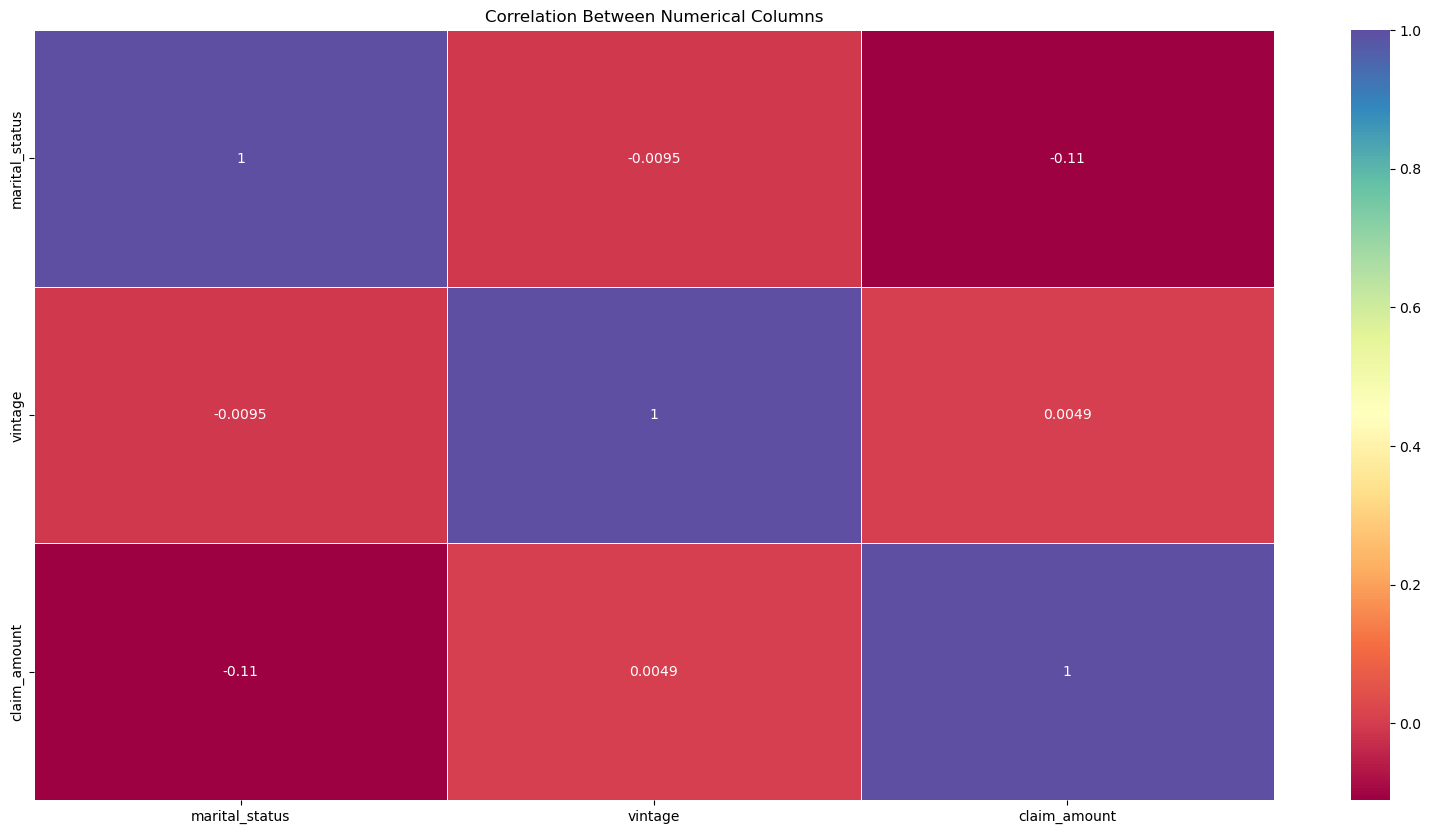

In [39]:
# correlation matrix for numerical columns
corr_matrix = numeric_data.corr()
plt.figure(figsize=(20,10))
plt.title('Correlation Between Numerical Columns')
sns.heatmap(corr_matrix,annot=True,xticklabels=True, yticklabels=True,linewidth=.5,cmap='Spectral')
plt.show()

No high correlation values observed between numerical columns

### Preprocessing

In [40]:
# Getting numerical columns for scaling
num =  data.select_dtypes(include=[np.number]).columns.drop(['marital_status','vintage'])
num

Index(['claim_amount'], dtype='object')

In [41]:
#Standard Scaling the data
for i in num:
    data[[i]]=scalar.fit_transform(data[[i]])

In [42]:
# Getting categorical columns for encoding
col = categorical_data.columns
col

Index(['gender', 'area', 'qualification', 'income', 'num_policies', 'policy',
       'type_of_policy'],
      dtype='object')

In [43]:
# label encoding columns od object dtype
from sklearn import preprocessing
lable_encd=preprocessing.LabelEncoder()
for feat in col:
    data[feat]=lable_encd.fit_transform(data[feat].astype(str))
data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
id,,,,,,,,,,
89393,0,0,1,1,0,6,-0.679572,1,1,2
89394,0,1,1,0,0,4,-0.081051,1,0,1
89395,1,0,1,1,1,7,-0.439008,1,1,0
89396,0,0,0,3,1,2,-1.328578,1,1,2
89397,0,1,1,0,0,5,2.947137,1,1,2


In [44]:
# Write out cleaned data
data.to_csv("C:/Users/sneha kannan/Desktop/jobathon/test_cleaned.csv",index=False)

## Modeling using train dataset

In [45]:
# Reading cleaned train dataset
adrs_train_clnd="C:/Users/sneha kannan/Desktop/jobathon/train_cleaned.csv"
data=pd.read_csv(adrs_train_clnd)

In [46]:
# viewing dataset
data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,0,1,1,5,0.440602,1,0,1,64308
1,1,0,1,1,0,8,0.222942,1,0,1,515400
2,1,1,0,1,1,8,-0.537641,1,0,1,64212
3,0,0,1,1,0,7,-1.334398,1,0,1,97920
4,1,1,1,3,1,6,-0.258975,1,0,0,59736


In [47]:
# Splitting dataset into target and features
x=data.drop(['cltv'],axis=1)
y=data['cltv']

In [48]:
# assigning training and testing values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

In [49]:
# importing libraries
from sklearn.linear_model  import LinearRegression
from sklearn.linear_model import Lasso

#### Linear Regression

In [50]:
lr=LinearRegression()
model1=lr.fit(x_train,y_train)
predict1=model1.predict(x_test)

In [51]:
predict1

array([120703.03529038, 124484.30337772, 124773.36441608, ...,
       105607.51310974, 105463.61162886, 131650.00015398])

In [52]:
from sklearn.metrics import mean_squared_error,r2_score

In [53]:
print('The mean squred error in the predicted value is:',mean_squared_error(y_test,predict1))
print('The r squared value is:',r2_score(y_test,predict1))

The mean squred error in the predicted value is: 6956707200.555599
The r squared value is: 0.15068062195873333


#### Lasso Regression

In [54]:
lasso = Lasso(alpha = 1)
model2=lasso.fit(x_train, y_train)
predict2 = model2.predict(x_test)

In [55]:
print('The mean squred error in the predicted value is:',mean_squared_error(y_test,predict2))
print('The r squared value is:',r2_score(y_test,predict2))

The mean squred error in the predicted value is: 6956705454.973587
The r squared value is: 0.15068083507056718


Choosing Lasso Regression on the basis of performance metrics.

### Predicted values for test dataset

In [56]:
# Reading cleaned test dataset
adrs_test_clnd="C:/Users/sneha kannan/Desktop/jobathon/test_cleaned.csv"
data=pd.read_csv(adrs_test_clnd)

In [57]:
# viewing dataset
data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,0,0,1,1,0,6,-0.679572,1,1,2
1,0,1,1,0,0,4,-0.081051,1,0,1
2,1,0,1,1,1,7,-0.439008,1,1,0
3,0,0,0,3,1,2,-1.328578,1,1,2
4,0,1,1,0,0,5,2.947137,1,1,2


In [58]:
# assigning test dataset as x test
x_test=data

In [59]:
# Predicting using test dataset
predict2=model2.predict(x_test)
predict2

array([107678.7772739 , 124434.64454424, 108877.44944726, ...,
       115726.45580477, 112928.24181604, 123124.83418902])

In [60]:
predicted_sales=pd.DataFrame(predict2,columns=['cltv'])
predicted_sales

,cltv
0,107678.777274
1,124434.644544
2,108877.449447
3,92719.006153
4,151512.447991
...,...
59590,33016.955138
59591,51789.118523
59592,115726.455805
59593,112928.241816


In [61]:
# Reading sample file
sample=pd.read_csv("C:/Users/sneha kannan/Desktop/jobathon/sample_submission_9zqft7i/sample_submission.csv")
sample.head()

,id,cltv
0,89393,97952.828978
1,89394,97952.828978
2,89395,97952.828978
3,89396,97952.828978
4,89397,97952.828978


In [62]:
sample.shape

(59595, 2)

In [63]:
# dropping the Item outlet sales from sample file
sample.drop(['cltv'],axis=1,inplace=True)

In [64]:
# Concatenating predicted values with sample file
sample_predictions=pd.concat([sample,predicted_sales],axis=1)
sample_predictions

,id,cltv
0,89393,107678.777274
1,89394,124434.644544
2,89395,108877.449447
3,89396,92719.006153
4,89397,151512.447991
...,...,...
59590,148983,33016.955138
59591,148984,51789.118523
59592,148985,115726.455805
59593,148986,112928.241816


In [65]:
# saving sample predictions as csv file
sample_predictions.to_csv("C:/Users/sneha kannan/Desktop/jobathon/sample_predictions_lasso.csv",index=False)